Saving drug200.csv to drug200.csv
Columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


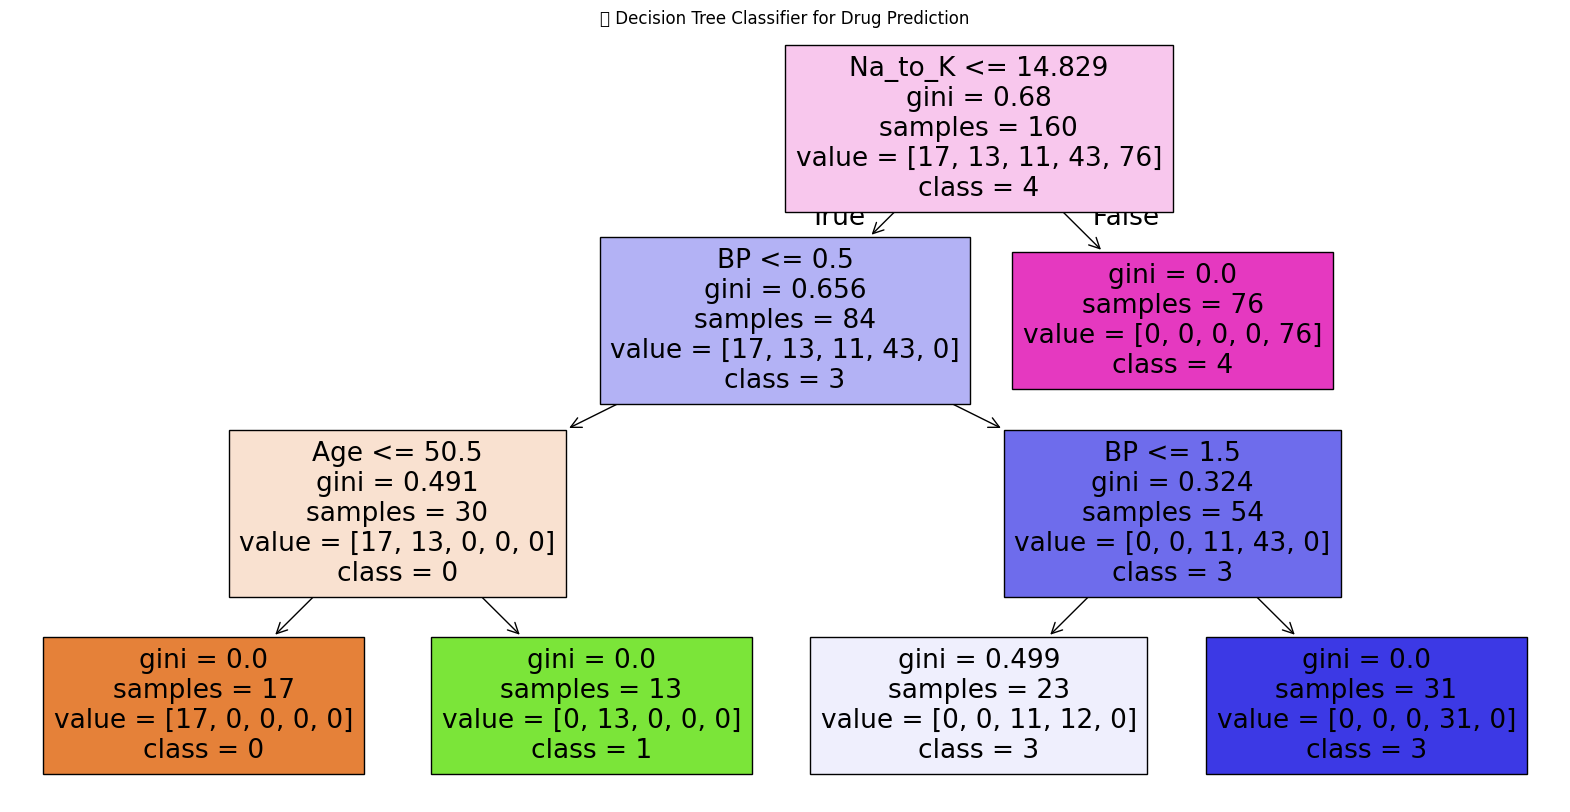

In [4]:
# 1. Upload your drug dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

filename = next(iter(uploaded))
dataframe = pd.read_csv(io.BytesIO(uploaded[filename]))

# 2. Preview columns
print("Columns:", dataframe.columns.tolist())
dataframe.head()
# Replace 'Drug' with your actual target column name if it's different
target_column = 'Drug'

X = dataframe.drop(columns=[target_column])
y = dataframe[target_column]
from sklearn.preprocessing import LabelEncoder

# Auto-label encode all categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(cls) for cls in set(y)], filled=True)
plt.title("🌿 Decision Tree Classifier for Drug Prediction")
plt.show()
